In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

from mat2json import loadMat
from util import getBatteryCapacity, getChargingValues, getDischargingValues, getDataframe

In [4]:
#Ambient temp 24
B0005 = loadMat('B0005.mat')
B0006 = loadMat('B0006.mat')
B0007 = loadMat('B0007.mat')
B0018 = loadMat('B0018.mat')

In [5]:
B0005_capacity = getBatteryCapacity(B0005)
B0006_capacity = getBatteryCapacity(B0006)
B0007_capacity = getBatteryCapacity(B0007)
B0018_capacity = getBatteryCapacity(B0018)

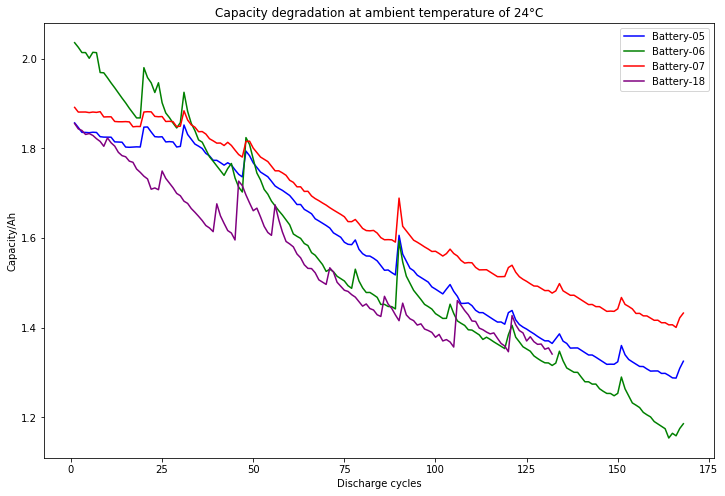

In [6]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(B0005_capacity[0], B0005_capacity[1], color='blue', label='Battery-05')
ax.plot(B0006_capacity[0], B0006_capacity[1], color='green', label='Battery-06')
ax.plot(B0007_capacity[0], B0007_capacity[1], color='red', label='Battery-07')
ax.plot(B0018_capacity[0], B0018_capacity[1], color='purple', label='Battery-18')
ax.set(xlabel='Discharge cycles', ylabel='Capacity/Ah', title='Capacity degradation at ambient temperature of 24°C')
plt.legend()

In [7]:
ployfit24degree = np.polyfit(B0005_capacity[0], B0005_capacity[1], 1)

In [8]:
pred_range = []
for i in range(1, 270):
    pred_range.append(i)

In [9]:
B0005_capacity_pred = np.polyval(ployfit24degree, pred_range)

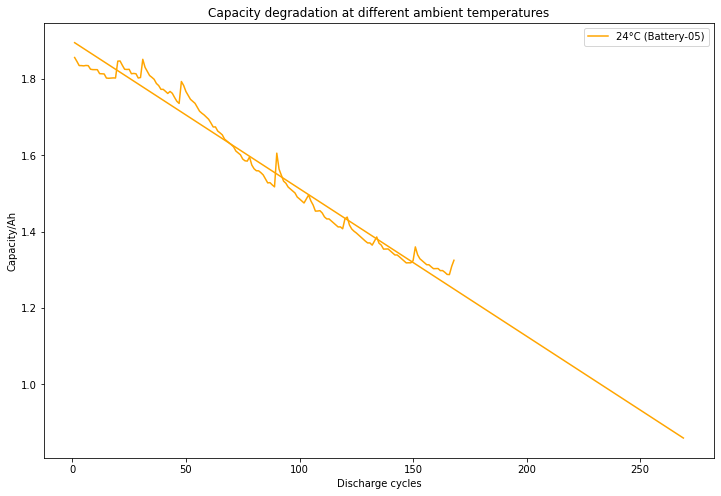

In [10]:
fig, ax = plt.subplots(1, figsize=(12, 8))


ax.plot(B0005_capacity[0], B0005_capacity[1], color='orange', label='24°C (Battery-05)')
ax.plot(pred_range, B0005_capacity_pred, color='orange')

ax.set(xlabel='Discharge cycles', ylabel='Capacity/Ah', title='Capacity degradation at different ambient temperatures')
plt.legend()

In [11]:
B0005_charging = getChargingValues(B0005, 0)
charging_labels = ['Voltage_measured','Current_measured','Temperature_measured']

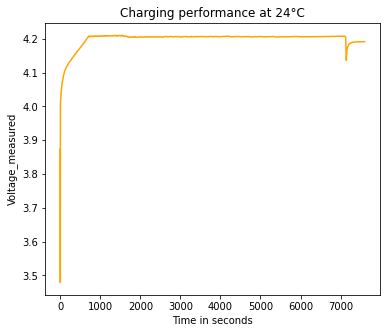

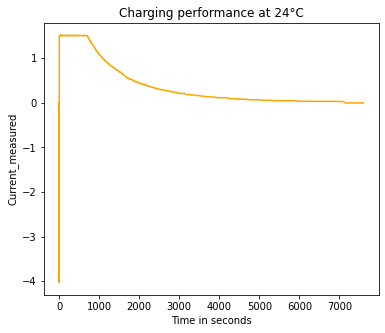

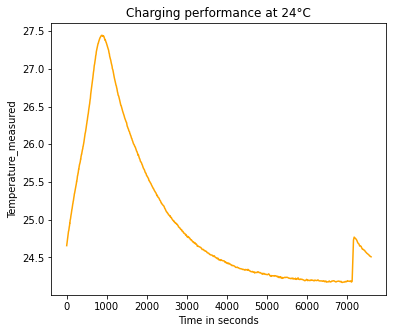

In [12]:
indx = 1
for label in charging_labels:
    
    fig1, ax1 = plt.subplots(1, figsize=(6, 5))
    

    
    ax1.plot(B0005_charging[5], B0005_charging[indx], color='orange')
    

    
    ax1.set(xlabel='Time in seconds', ylabel=label, title='Charging performance at 24°C')
    
    
    indx += 1

In [13]:
B0005_charging_400 = getChargingValues(B0005, 400)

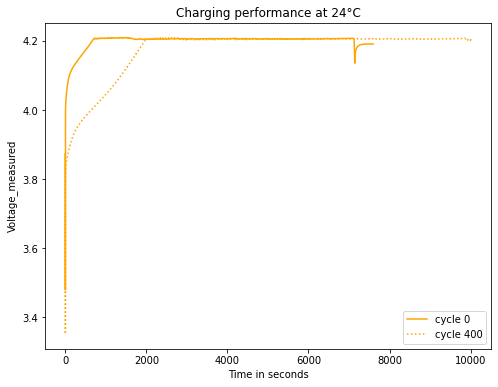

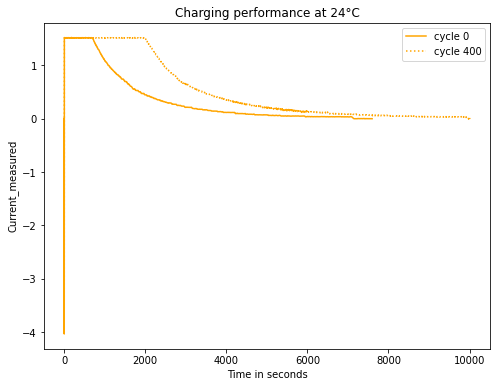

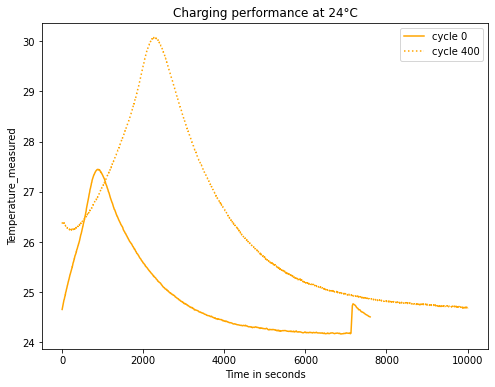

In [14]:
indx = 1
for label in charging_labels:
    
    fig1, ax1 = plt.subplots(1, figsize=(8, 6))
    


    ax1.plot(B0005_charging[5], B0005_charging[indx], color='orange', label='cycle 0')
    ax1.plot(B0005_charging_400[5], B0005_charging_400[indx], linestyle=':', color='orange', label='cycle 400')
  

    
    ax1.set(xlabel='Time in seconds', ylabel=label, title='Charging performance at 24°C')
    
    
    ax1.legend()
    
    
    indx += 1

In [15]:
B0005_discharging = getDischargingValues(B0005, 1)
discharging_labels = ['Voltage_measured','Current_measured','Temperature_measured']

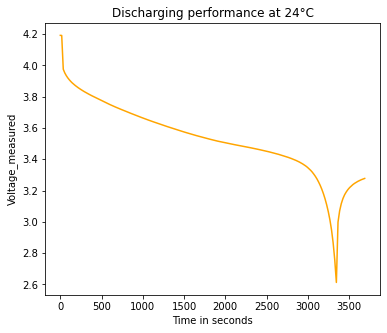

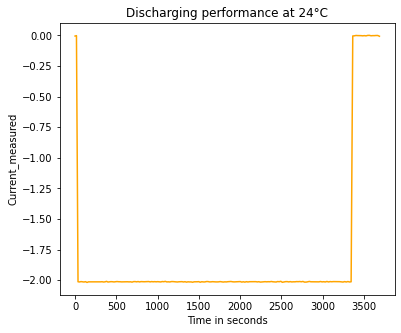

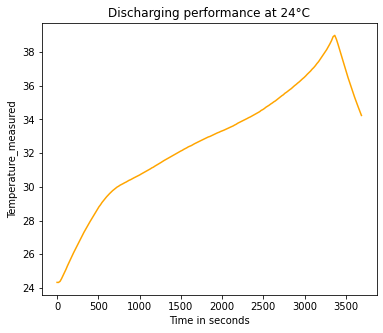

In [16]:
indx = 1
for label in discharging_labels:
    
    fig1, ax1 = plt.subplots(1, figsize=(6, 5))
    

    
    ax1.plot(B0005_discharging[5], B0005_discharging[indx], color='orange')
    
    
    ax1.set(xlabel='Time in seconds', ylabel=label, title='Discharging performance at 24°C')
  
    
    indx += 1

In [17]:
B0005_discharging_402 = getDischargingValues(B0005, 402)

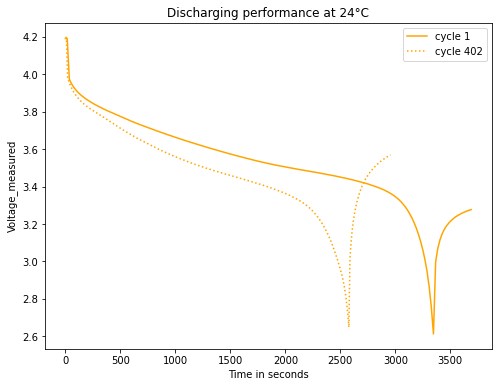

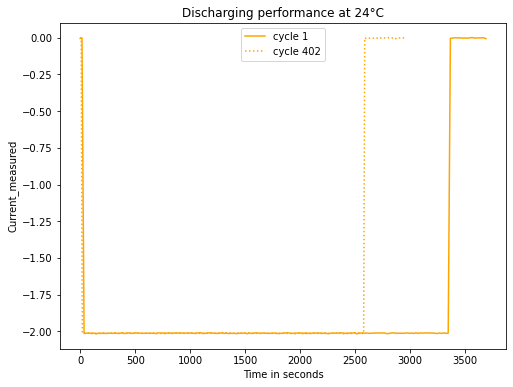

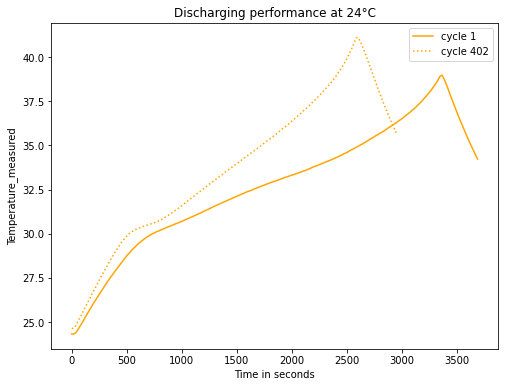

In [18]:
indx = 1
for label in charging_labels:
    
    fig1, ax1 = plt.subplots(1, figsize=(8, 6))
    


    ax1.plot(B0005_discharging[5], B0005_discharging[indx], color='orange', label='cycle 1')
    ax1.plot(B0005_discharging_402[5], B0005_discharging_402[indx], linestyle=':', color='orange', label='cycle 402')
    
    ax1.set(xlabel='Time in seconds', ylabel=label, title='Discharging performance at 24°C')
   
    ax1.legend()
   
    
    indx += 1

In [19]:
dfB0005 = getDataframe(B0005)
dfB0006 = getDataframe(B0006)
dfB0007 = getDataframe(B0007)
dfB0018 = getDataframe(B0018)

In [20]:
X = dfB0005['cycle']
Y = dfB0005['capacity']

In [21]:
ratios = [40, 30, 20, 10]
for ratio in ratios:

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ratio, shuffle=False)

    d = {'X_train':X_train.values,'y_train':y_train.values}
    d = pd.DataFrame(d)

    X_train = d['X_train']
    y_train = d['y_train']

    X_train = X_train.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)


    best_svr = SVR(C=20, epsilon=0.0001, gamma=0.0001, cache_size=200,
      kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

    best_svr.fit(X_train,y_train)
    
    if ratio == 40:
        y_pred_40 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 30:
        y_pred_30 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 20:
        y_pred_20 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 10:
        y_pred_10 = best_svr.predict(X.values.reshape(-1, 1))
        

C:\Users\aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

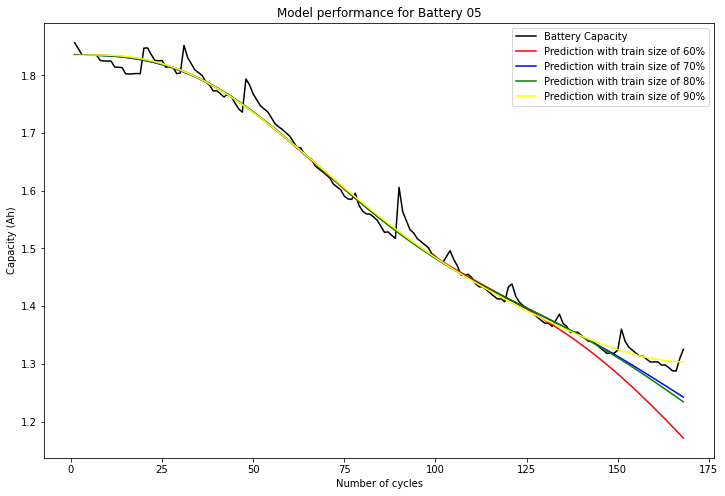

In [22]:

label = "Capacity (Ah)"

fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(X, Y, color='black', label='Battery Capacity')
ax.plot(X, y_pred_40, color='red', label='Prediction with train size of 60%')
ax.plot(X, y_pred_30, color='blue', label='Prediction with train size of 70%')
ax.plot(X, y_pred_20, color='green', label='Prediction with train size of 80%')
ax.plot(X, y_pred_10, color='yellow', label='Prediction with train size of 90%')

ax.set(xlabel='Number of cycles', ylabel=label, title='Model performance for Battery 05')
ax.legend()

In [23]:
import sklearn.metrics,math

def sse(pred,actual):
    ss = np.sum((pred - actual)**2)
    return ss

def mse(pred,actual):
    mse = sklearn.metrics.mean_squared_error(actual, pred)
    return mse

def rmse(pred,actual):
    rmse = math.sqrt(mse(pred,actual))
    return rmse

import numpy as np

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

from sklearn.metrics import r2_score 

def R_square(pred,actual):
    R_square = r2_score(pred, actual) 
    return R_square

import numpy as np
from sklearn.metrics import mean_absolute_error

def mae(pred,actual):
    mae=mean_absolute_error(actual, pred)
    return mae

In [26]:
err=[y_pred_40, y_pred_30, y_pred_20, y_pred_10]
r=40
# print(Y)
for e in err:
    print(r)
    print(sse(e,Y))
    print(mse(e,Y))
    print(rmse(e,Y))
    print(R_square(e,Y))
    print(mae(e,Y))
    r=r-10
    
    bat_break_pred= min(e, key=lambda x:abs(x-1.4))
    print(bat_break_pred)
    
    bat_break_act= min(Y, key=lambda x:abs(x-1.4))
    print(bat_break_act)

    a=0
    for i in e:
        a=a+1
        if(i==bat_break_pred):
            print(a)

    a=0
    for i in Y:
        a=a+1
        if(i==bat_break_act):
            print(a)
        
print(Y[124])



40
0.18570816234908655
0.0011054057282683723
0.033247642446771655
0.9739181554176957
0.020113488062341884
1.398324133564112
1.4012037783587625
124
124
30
0.06232394354195879
0.00037097585441642135
0.019260733485940283
0.9902149344054165
0.01329214251261573
1.3997221902796282
1.4012037783587625
124
124
20
0.06984690055520063
0.0004157553604476228
0.020390079951967396
0.9891532424255874
0.01380387558892107
1.400108627451191
1.4012037783587625
124
124
10
0.039783140794971986
0.00023680440949388088
0.015388450522839553
0.9934174291557166
0.010824959359754827
1.3986532176781594
1.4012037783587625
123
124
1.3967008232726328


NameError: name 'Y' is not defined